# Explanatory Power Exercise

In [113]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
import scipy.stats

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress  error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [114]:
# Acquire, load, and preview the data.
data = pd.read_csv('advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['sales'].values.reshape(-1, 1)
X = data[['TV','radio','newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [ 2.93888937]

R-squared:
0.897210638179


## Multivariate Normality

The residuals appear to be slightly skewed, let's see if we can transform some our data to normalize our residuals.

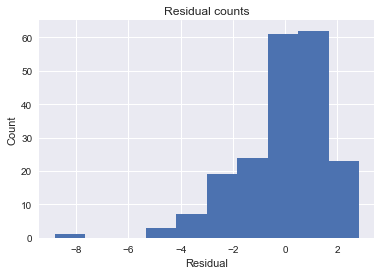

In [119]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

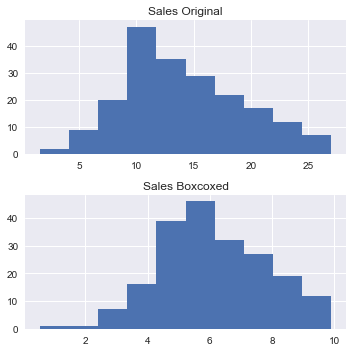

In [120]:
data['sales_boxcox'] = scipy.stats.boxcox(data['sales'])[0]
plt.figure(figsize=(5,5))

plt.subplot(2,1,1)
plt.hist(data['sales'])
plt.title('Sales Original')

plt.subplot(2,1,2)
plt.hist(data['sales_boxcox'])
plt.title('Sales Boxcoxed')

plt.tight_layout()

### TV

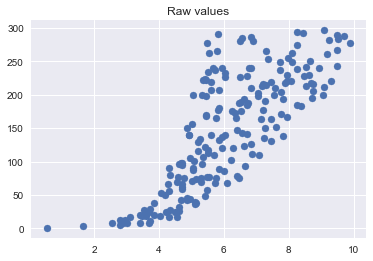

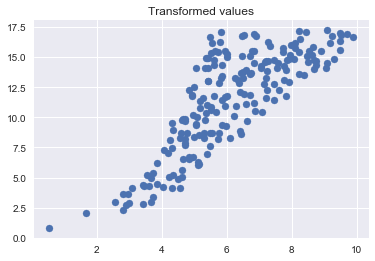

In [121]:
# Create initial plot of TV
plt.scatter(data['sales_boxcox'], data['TV'])
plt.title('Raw values')
plt.show()

#Transform TV and replot to see if relationship becomes more linear 
sqrt_feature = [math.sqrt(x) for x in data['TV']]

plt.scatter(data['sales_boxcox'], sqrt_feature)
plt.title('Transformed values')
plt.show()

### Newspaper

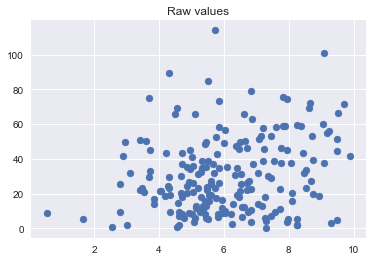

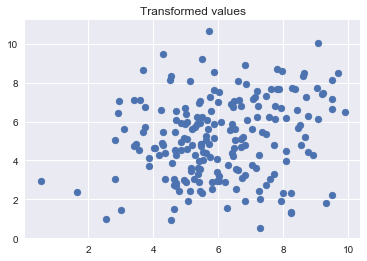

In [122]:
# Create initial plot of newspaper variable
plt.scatter(data['sales_boxcox'], data['newspaper'])
plt.title('Raw values')
plt.show()

#Transform newspaper and replot to see if relationship becomes more linear 
sqrt_feature = [math.sqrt(x) for x in data['newspaper']]

plt.scatter(data['sales_boxcox'], sqrt_feature)
plt.title('Transformed values')
plt.show()

### Radio

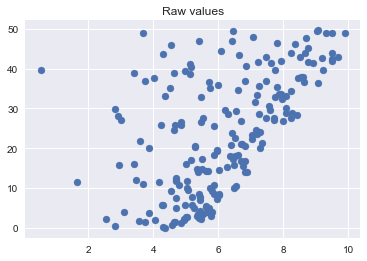

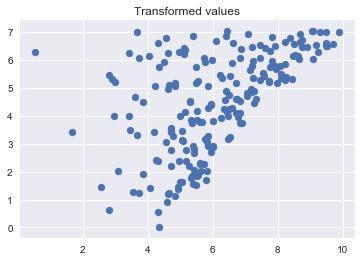

In [123]:
# Create initial plot for radio variable
plt.scatter(data['sales_boxcox'], data['radio'])
plt.title('Raw values')
plt.show()


#Transform radio and replot to see if relationship becomes more linear 
sqrt_feature = [math.sqrt(x) for x in data['radio']]

plt.scatter(data['sales_boxcox'], sqrt_feature)
plt.title('Transformed values')
plt.show()

In [124]:
#Assign non-linear transformations to variables
data['tv_transform'] = [math.sqrt(x) for x in data['TV']]
data['newspaper_transform'] = [math.sqrt(x) for x in data['newspaper']]
data['radio_transform'] = [math.sqrt(x) for x in data['radio']]


Coefficients: 
 [[ 0.48877936  0.33311384  0.0185777 ]]

Intercept: 
 [ 0.00331915]

R-squared:
0.92384472932


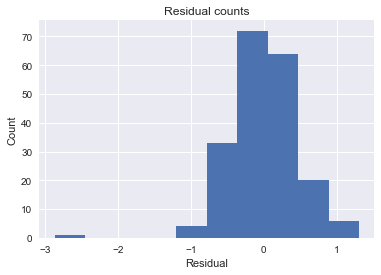

In [125]:
# Instantiate and fit  model.
regr = linear_model.LinearRegression()
Y = data['sales_boxcox'].values.reshape(-1, 1)
X = data[['radio_transform','tv_transform','newspaper_transform']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['sales_boxcox']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

With the exception of an outlier, our residuals appear to be more normally distributed than before.

## Homoscedasticity 

After the variables were transformed, the variance in residuals for mid to high values appears to be improved. However, almost no improvement is seen for lower values.

Will need to work more on this, want to discuss during our meeting. 

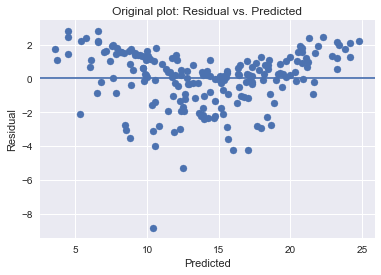

In [116]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Original plot: Residual vs. Predicted')
plt.show()

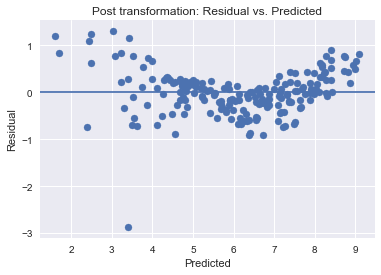

In [126]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Post transformation: Residual vs. Predicted')
plt.show()

## Low Multicollinearity

The assumption of low multicollinearity is satisfied.

In [127]:
correlation_matrix = X.corr()
display(correlation_matrix)

,radio_transform,tv_transform,newspaper_transform
radio_transform,1.000,0.040,0.294
tv_transform,0.040,1.000,0.042
newspaper_transform,0.294,0.042,1.000
